importing the required libraries

In [2]:
import requests
import lxml.html as lh
import bs4 as bs
import urllib.request
import numpy as np 
import pandas as pd

taking the data out by providing the URL

In [3]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
res = requests.get(url)
soup = bs.BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0]
df = pd.read_html(str(table))
data = pd.read_json(df[0].to_json(orient='records'))

printing the data as a whole

In [4]:
data

,Borough,Neighborhood,Postal Code
0,Not assigned,Not assigned,M1A
1,Not assigned,Not assigned,M2A
2,North York,Parkwoods,M3A
3,North York,Victoria Village,M4A
4,Downtown Toronto,"Regent Park, Harbourfront",M5A
5,North York,"Lawrence Manor, Lawrence Heights",M6A
6,Downtown Toronto,"Queen's Park, Ontario Provincial Government",M7A
7,Not assigned,Not assigned,M8A
8,Etobicoke,"Islington Avenue, Humber Valley Village",M9A
9,Scarborough,"Malvern, Rouge",M1B


taking 'not assigned' records out of the data and printing the first five records

In [5]:
raw_data_selected = data[data['Borough'] != 'Not assigned']
raw_data_selected = raw_data_selected.groupby(['Borough', 'Postal Code'], as_index=False).agg(','.join)
raw_data_selected.head()

,Borough,Postal Code,Neighborhood
0,Central Toronto,M4N,Lawrence Park
1,Central Toronto,M4P,Davisville North
2,Central Toronto,M4R,"North Toronto West, Lawrence Park"
3,Central Toronto,M4S,Davisville
4,Central Toronto,M4T,"Moore Park, Summerhill East"


In [6]:
raw_data_selected['Neighborhood'] = np.where(raw_data_selected['Neighborhood'] == 'Not assigned', raw_data_selected['Borough'], raw_data_selected['Neighborhood'])

printing the shape of data

In [7]:
raw_data_selected.shape

(103, 3)

loading the CSV file

In [8]:
geospatial_data = pd.read_csv("Geospatial_Coordinates.csv")

taking the first five records out

In [9]:
geospatial_data.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [10]:
geospatial_data.columns = ['Postal Code', 'Latitude', 'Longitude']

In [11]:
geospatial_data.columns

Index(['Postal Code', 'Latitude', 'Longitude'], dtype='object')

In [12]:
merged_data = pd.merge(raw_data_selected, geospatial_data, on='Postal Code')

In [13]:
merged_data.head()

,Borough,Postal Code,Neighborhood,Latitude,Longitude
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197
2,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678
3,Central Toronto,M4S,Davisville,43.704324,-79.388790
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160


In [14]:
merged_data['Coordinates'] = list(zip(merged_data['Latitude'], merged_data['Longitude']))

In [15]:
merged_data.head()

,Borough,Postal Code,Neighborhood,Latitude,Longitude,Coordinates
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790,"(43.7280205, -79.3887901)"
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197,"(43.7127511, -79.3901975)"
2,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678,"(43.7153834, -79.40567840000001)"
3,Central Toronto,M4S,Davisville,43.704324,-79.388790,"(43.7043244, -79.3887901)"
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160,"(43.6895743, -79.38315990000001)"


In [28]:
import matplotlib.pyplot as plt

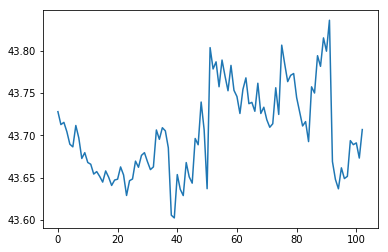

In [31]:
plt.plot(merged_data['Latitude'])

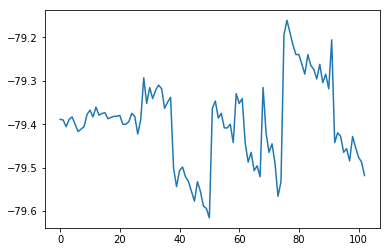

In [32]:
plt.plot(merged_data['Longitude'])